In [1]:
import sqlite3

DBCONN = None

def get_database(dbname = 'fitcraft.db'):
    """
    datetime
    user
    vlaue
    """
    global DBCONN
    if DBCONN == None:
        DBCONN = sqlite3.connect(dbname)
    return DBCONN

In [2]:
def close_database():
    global DBCONN
    if DBCONN != None:
        DBCONN.close()

<IPython.core.display.Javascript object>


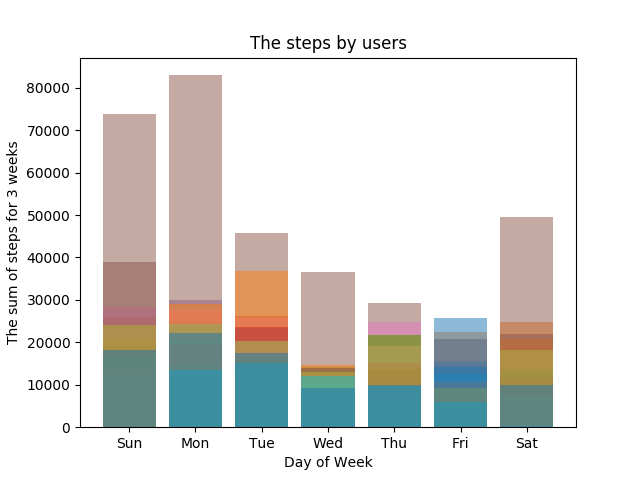

In [3]:
%matplotlib notebook
import sys
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

conn = get_database()
cursor = conn.cursor()

cursor.execute(('SELECT '
              + 'strftime("%w", datetime(datetime, "unixepoch")) '
              + 'as week, user, sum(value) '
              + 'FROM steps WHERE user LIKE "A%" '
              + 'GROUP BY week, user '
              + 'ORDER BY user ASC, week ASC'))
data = cursor.fetchall()
count = 0
x_axis = list()
y_axis = list()
for row in data:
    x_axis.append(row[0])
    y_axis.append(row[2])
    count = count + 1
    if count == 7:
        plt.bar(x_axis, y_axis, alpha = 0.5)
        x_axis.clear()
        y_axis.clear()
        count = 0
plt.xticks(range(0, 7),
           ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xlabel('Day of Week')
plt.ylabel('The sum of steps for 3 weeks')
plt.title('The steps by users')
plt.show()